## Aula 3


### Image Pre-processing using Face dataset from Georgia Tech

- there are 50 person with 15 pics each: 750 pics total
- 10 pics will be used for training and 5 pics for test and validation

In [61]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil

Let's explore some images

In [20]:
im_face_1 = cv2.imread('../resources/cropped_faces/s01_01.jpg')
im_face_1 = cv2.cvtColor(im_face_1, cv2.COLOR_BGR2RGB)

im_face_2 = cv2.imread('../resources/cropped_faces/s02_01.jpg')
im_face_2 = cv2.cvtColor(im_face_2, cv2.COLOR_BGR2RGB)

im_face_3 = cv2.imread('../resources/cropped_faces/s03_01.jpg')
im_face_3 = cv2.cvtColor(im_face_3, cv2.COLOR_BGR2RGB)

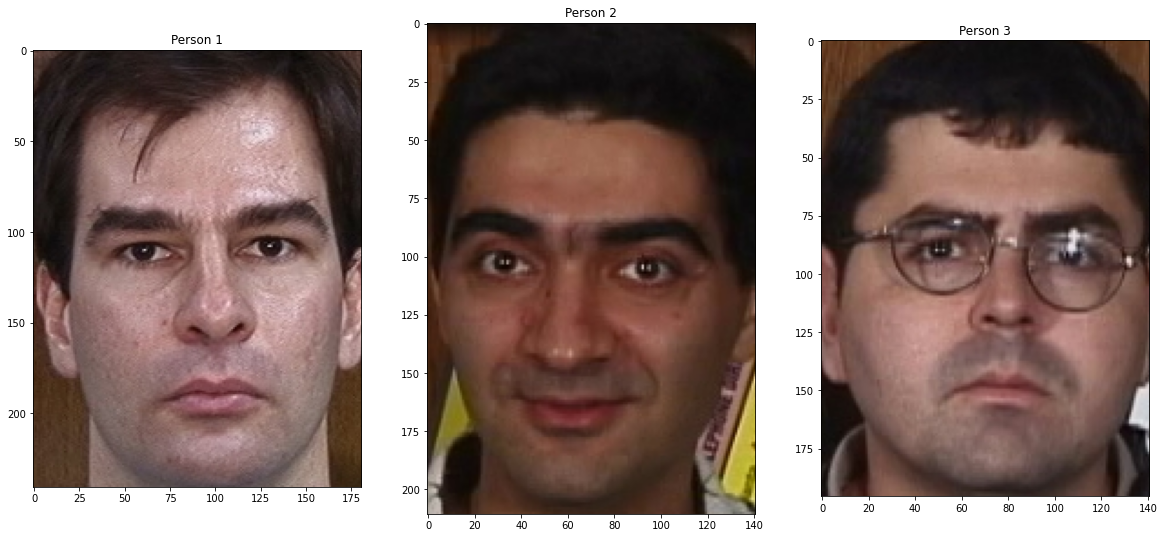

In [23]:
## ploting 3 pics in the same image
plt.figure(figsize=(20,10))
plt.subplot(131)  #-- nrows, ncols, and index in order
plt.title('Person 1')
plt.imshow(im_face_1)

plt.subplot(132)
plt.title('Person 2')
plt.imshow(im_face_2)

plt.subplot(133)
plt.title('Person 3')
plt.imshow(im_face_3)

plt.show()

#### It is possible to see that we have pics with different size. First, we need to resize the pics to have always the same size and proceed to the data processing

In [26]:
print('Image 1 shape: ', im_face_1.shape)
print('Image 2 shape: ', im_face_2.shape)
print('Image 3 shape: ', im_face_3.shape)


Image 1 shape:  (241, 181, 3)
Image 2 shape:  (211, 141, 3)
Image 3 shape:  (196, 141, 3)


#### But first, let's create the training and test folder (if it does not exist) and save the pics to the correct path.

In [31]:
im_faces_path = '../resources/cropped_faces/'

##Create a list with all pic file names
faces_file_list = [f for f in listdir(im_faces_path) if isfile(join(im_faces_path, f))]

In [42]:
len(faces_file_list)

750

In [46]:
##-- Let's create now the directories training and test

faces_training_path = '../resources/faces_training/'
faces_test_path = '../resources/faces_test/'

if not path.exists(faces_training_path):
    makedirs(faces_training_path)
    
if not path.exists(faces_test_path):
    makedirs(faces_test_path)

In [50]:
##-- Now, split the pics in training (10) and test (5)
##---- remembering that the file name is sXX_YY ... so, the XX caracthers are the 
##---- person and the YY are the pic id.

for file in faces_file_list:
    person = file[1:3]
    im_id = file[4:6]
    
    if int(im_id) <= 10:
        shutil.copyfile(im_faces_path + file, faces_training_path + file)
    else:
        shutil.copyfile(im_faces_path + file, faces_test_path + file)


##### Now let's resize the images

In [86]:
## Just checking the average height and width to have an ideia 

im_list = []
im_heigths =[]
im_widths = []

for i in range(len(faces_file_list)):    
    im = cv2.imread(im_faces_path+faces_file_list[i])
    im_list.append(im)
    im_heigths.append(im.shape[0])
    im_widths.append(im.shape[1])


avg_height = np.average(im_heigths)
avg_widths = np.average(im_widths)

avg_height2 = np.mean(im_heigths)
avg_widths2 = np.mean(im_widths)

avg_height3 = np.median(im_heigths)
avg_widths3 = np.median(im_widths)

print('Average height: ', avg_height)
print('Average width: ', avg_widths)

print('Mean height: ', avg_height2)
print('Mean width: ', avg_widths2)

print('Median height: ', avg_height3)
print('Median width: ', avg_widths3)

Average height:  208.488
Average width:  142.992
Mean height:  208.488
Mean width:  142.992
Median height:  206.0
Median width:  141.0


In [80]:
def resize_image(im_path):
    im = cv2.imread(im_path, cv2.IMREAD_GRAYSCALE)
    im = cv2.resize(im, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return im

In [75]:
##Create a list with all pic file names from Training folder
faces_training_nameList = [f for f in listdir(faces_training_path) if isfile(join(faces_training_path, f))]

##Create a list with all pic file names from Test folder
faces_test_nameList = [f for f in listdir(faces_test_path) if isfile(join(faces_test_path, f))]

In [84]:
for i in range(len(faces_training_nameList)):
    im = resize_image(faces_training_path+faces_training_nameList[i])    
    cv2.imwrite(faces_training_path+faces_training_nameList[i], im)
    
    
for i in range(len(faces_test_nameList)):
    im = resize_image(faces_test_path+faces_test_nameList[i])    
    cv2.imwrite(faces_test_path+faces_test_nameList[i], im)

In [89]:
## Just checking the average height and width to confirm that all is correct
im_list = []
im_heigths =[]
im_widths = []

for i in range(len(faces_training_nameList)):    
    im = cv2.imread(faces_training_path+faces_training_nameList[i])
    im_list.append(im)
    im_heigths.append(im.shape[0])
    im_widths.append(im.shape[1])


avg_height = np.average(im_heigths)
avg_widths = np.average(im_widths)

avg_height2 = np.mean(im_heigths)
avg_widths2 = np.mean(im_widths)

avg_height3 = np.median(im_heigths)
avg_widths3 = np.median(im_widths)

print('Average height: ', avg_height)
print('Average width: ', avg_widths)

print('Mean height: ', avg_height2)
print('Mean width: ', avg_widths2)

print('Median height: ', avg_height3)
print('Median width: ', avg_widths3)

Average height:  200.0
Average width:  200.0
Mean height:  200.0
Mean width:  200.0
Median height:  200.0
Median width:  200.0


In [90]:
## Just checking the average height and width to confirm that all is correct
im_list = []
im_heigths =[]
im_widths = []

for i in range(len(faces_test_nameList)):    
    im = cv2.imread(faces_test_path+faces_test_nameList[i])
    im_list.append(im)
    im_heigths.append(im.shape[0])
    im_widths.append(im.shape[1])


avg_height = np.average(im_heigths)
avg_widths = np.average(im_widths)

avg_height2 = np.mean(im_heigths)
avg_widths2 = np.mean(im_widths)

avg_height3 = np.median(im_heigths)
avg_widths3 = np.median(im_widths)

print('Average height: ', avg_height)
print('Average width: ', avg_widths)

print('Mean height: ', avg_height2)
print('Mean width: ', avg_widths2)

print('Median height: ', avg_height3)
print('Median width: ', avg_widths3)

Average height:  200.0
Average width:  200.0
Mean height:  200.0
Mean width:  200.0
Median height:  200.0
Median width:  200.0
